Han evaluated predictions using multiple cutoff percents and then filtering out the best result for each station pollutant.

In [17]:
import sys
sys.path.append('../..')
from src.modules.evaluation import *
import matplotlib.pyplot as plt

# Read df with y true and y pred from different models from 02_Models

In [2]:
df_rf = pd.read_csv('../../results/models/rf_04_20200103_20200310.csv', index_col=0)
df_extree = pd.read_csv('../../results/models/extree_04_20200103_20200310.csv', index_col=0)
df_xgb = pd.read_csv('../../results/models/xgb_04_20200103_20200310.csv', index_col=0)
df_pro = pd.read_csv('../../results/models/prophet_04_20200103_20200310.csv', index_col=0, header=[0,1,2])

# index to datetime
dfs = [df_rf, df_extree, df_xgb, df_pro]
for df in dfs:
    df.index = pd.to_datetime(df.index)

In [3]:
display(df_rf)
display(df_pro)

,D_NO2,D_NO2_pred,N_NO2,N_NO2_pred,O_NO2,O_NO2_pred,S_NO2,S_NO2_pred,W_NO2,W_NO2_pred,...,O_PM10K,O_PM10K_pred,S_PM10K,S_PM10K_pred,W_PM10K,W_PM10K_pred,N_O3,N_O3_pred,S_O3,S_O3_pred
2020-01-03,56.696457,58.632652,39.334070,38.490673,44.132984,42.080242,42.729170,49.302271,41.950268,44.575613,...,46.388460,34.913698,56.982330,52.255321,45.637370,39.344855,9.617968,20.209084,3.537352,6.915091
2020-01-04,66.766790,58.835236,43.032360,37.943533,47.897724,42.136814,48.308884,46.052183,49.090330,44.714654,...,37.184284,34.872038,57.270626,53.076709,38.993320,39.595008,6.617978,15.438404,1.221737,10.157322
2020-01-05,52.037860,57.057979,35.747350,33.440684,42.127870,41.311235,39.910446,48.220324,42.618286,43.034291,...,35.905117,37.045224,51.025585,47.366805,38.226850,31.145058,20.701195,23.733940,4.793549,8.971175
2020-01-06,32.097057,36.005107,13.998880,20.674946,21.196960,23.733125,20.614933,19.726656,17.250006,21.196471,...,16.606459,24.796482,13.068683,18.924878,12.079635,16.799884,55.537983,41.095946,46.128056,43.136378
2020-01-07,49.639480,60.289147,30.543589,35.574938,37.692710,43.405082,36.684887,50.255919,37.704323,44.643267,...,30.604795,33.890909,32.939518,50.672748,25.352188,37.013905,22.510405,20.563603,13.748825,9.398436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-06,47.934826,57.010615,23.931540,24.684927,23.563103,38.896325,29.860310,32.837648,30.248318,38.253223,...,19.673954,33.356379,22.934511,29.089321,18.844595,27.573340,47.858826,52.199077,38.594560,46.456389
2020-03-07,54.893112,56.473422,30.731730,25.521993,31.140863,34.022219,36.039930,45.095294,33.999302,35.161040,...,14.401324,30.234672,15.170040,36.751029,11.644395,30.724495,31.879847,36.407183,29.409145,24.415709
2020-03-08,39.672287,43.883177,18.303322,22.765905,19.777733,34.632241,22.489891,36.636955,26.882597,29.683811,...,18.801638,34.066318,18.809082,26.203612,15.616488,25.064877,40.864746,48.904296,32.988370,39.058197
2020-03-09,37.320225,39.176748,16.569525,19.186513,21.383870,33.411034,27.240894,37.218146,29.120990,22.949427,...,17.584291,32.142267,17.909945,31.960157,17.079546,25.604304,48.081580,51.300126,35.395940,31.860974


f0_add                                                         \
                D_NO2                 N_NO2                 O_NO2              
                 yhat          y       yhat          y       yhat          y   
ds                                                                             
2020-01-03  47.128515  56.696457  30.687054  39.334070  34.816279  44.132984   
2020-01-04  46.989032  64.316290  30.132661  40.563717  34.138211  47.122957   
2020-01-05  37.807865  52.037860  26.071201  35.747350  28.100080  42.127870   
2020-01-06  32.452076  32.097057  23.284748  13.998880  23.937769  21.196960   
2020-01-07  46.433365  49.639480  29.938373  30.543589  33.355029  37.692710   
...               ...        ...        ...        ...        ...        ...   
2020-03-06  48.864831  47.934826  25.807885  23.931540  32.401989  23.563103   
2020-03-07  48.658002  54.893112  25.081472  30.731730  31.602636  31.140863   
2020-03-08  39.331564  39.672287  20.820188  18.303322  25.391207  19.777733   
2020-03-09  33.753154  37.320225  17.806141  16.569525  21.003227  21.383870   
2020-03-10  47.436633  59.289640  24.204920  35.471115  30.143107  36.505016   

                                                        ...         f6  \
                S_NO2                 W_NO2             ...    O_PM10K   
                 yhat          y       yhat          y  ...       yhat   
ds                                                      ...              
2020-01-03  36.124008  42.729170  33.171985  41.950268  ...  35.086108   
2020-01-04  35.659437  48.308884  32.907099  45.323261  ...  33.644695   
2020-01-05  29.625064  39.910446  28.218164  42.618286  ...  24.894631   
2020-01-06  25.992454  20.614933  24.693789  17.250006  ...  15.074028   
2020-01-07  35.156644  36.684887  32.285526  37.704323  ...  29.186202   
...               ...        ...        ...        ...  ...        ...   
2020-03-06  34.549795  29.860310  30.525280  30.248318  ...  26.994410   
2020-03-07  33.991462  36.039930  30.262696  33.999302  ...  27.969530   
2020-03-08  27.814244  22.489891  25.540338  26.882597  ...  25.226639   
2020-03-09  23.989539  27.240894  21.944279  29.120990  ...  27.084203   
2020-03-10  32.913111  45.224900  29.424184  45.323261  ...  28.202052   

                                                                              \
                         S_PM10K               W_PM10K                  N_O3   
                    y       yhat          y       yhat          y       yhat   
ds                                                                             
2020-01-03  46.388460  42.212625  53.990231  34.473859  43.902282  16.645393   
2020-01-04  37.184284  42.392054  53.990231  34.279589  38.993320  14.480022   
2020-01-05  35.905117  33.704373  51.025585  26.014194  38.226850  19.518962   
2020-01-06  16.606459  18.700551  13.068683  14.505055  12.079635  33.281736   
2020-01-07  30.604795  37.231158  32.939518  28.656175  25.352188  24.694846   
...               ...        ...        ...        ...        ...        ...   
2020-03-06  19.673954  25.620861  22.934511  26.667950  18.844595  53.372648   
2020-03-07  14.401324  31.345820  15.170040  28.396818  11.644395  38.666333   
2020-03-08  18.801638  22.928258  18.809082  23.145052  15.616488  50.543773   
2020-03-09  17.584291  27.226882  17.909945  22.955578  17.079546  55.202003   
2020-03-10  32.242290  34.614791  37.680756  28.248330  27.224740  53.346103   

                                             
                            S_O3             
                    y       yhat          y  
ds                                           
2020-01-03   9.617968   8.371727   3.537352  
2020-01-04   6.617978   8.059930   1.221737  
2020-01-05  20.701195  14.193257   4.793549  
2020-01-06  55.537983  40.974447  46.128056  
2020-01-07  22.510405  16.745741  13.748825  
...               ...        ...        ...  
2020-03-06  47.858826  45.649824  38.59456

In [4]:
df_pro_dict = {}
for i in df_pro.columns.get_level_values(0).unique():
    df_pro_dict[i] = df_pro.filter(like=i, axis=1)

In [5]:
for key in df_pro_dict.keys():
    df_pro_dict[key].columns = df_pro_dict[key].columns.droplevel(0)
    df_pro_dict[key] = df_pro_dict[key].set_axis(df_pro_dict[key].columns.map('_'.join), axis=1)
    df_pro_dict[key].columns = df_pro_dict[key].columns.str.replace('yhat', 'pred')
    df_pro_dict[key].columns = df_pro_dict[key].columns.str.replace('_y', '')
    df_pro_dict[key] = df_pro_dict[key].reindex(sorted(df_pro_dict[key].columns), axis=1)

In [6]:
df_pro_dict['f0_mul'].head(1)

,D_NO2,D_NO2_pred,D_PM10K,D_PM10K_pred,N_NO2,N_NO2_pred,N_O3,N_O3_pred,N_PM10K,N_PM10K_pred,...,S_NO2,S_NO2_pred,S_O3,S_O3_pred,S_PM10K,S_PM10K_pred,W_NO2,W_NO2_pred,W_PM10K,W_PM10K_pred
ds,,,,,,,,,,,,,,,,,,,,,
2020-01-03,56.696457,45.606214,51.521755,32.768189,39.33407,28.75269,9.617968,14.34329,30.923414,24.525283,...,42.72917,33.794543,3.537352,12.166107,53.990231,34.508459,41.950268,31.791622,43.902282,27.692301


# RMSE, MAE, R2

In [7]:
df_pro_dict['f0_mul']

,D_NO2,D_NO2_pred,D_PM10K,D_PM10K_pred,N_NO2,N_NO2_pred,N_O3,N_O3_pred,N_PM10K,N_PM10K_pred,...,S_NO2,S_NO2_pred,S_O3,S_O3_pred,S_PM10K,S_PM10K_pred,W_NO2,W_NO2_pred,W_PM10K,W_PM10K_pred
ds,,,,,,,,,,,,,,,,,,,,,
2020-01-03,56.696457,45.606214,51.521755,32.768189,39.334070,28.752690,9.617968,14.343290,30.923414,24.525283,...,42.729170,33.794543,3.537352,12.166107,53.990231,34.508459,41.950268,31.791622,43.902282,27.692301
2020-01-04,64.316290,45.479675,52.611362,32.042326,40.563717,28.265058,6.617978,14.703298,34.168070,23.868919,...,48.308884,33.407377,1.221737,12.384342,53.990231,34.032685,45.323261,31.554737,38.993320,27.043086
2020-01-05,52.037860,37.636713,40.989760,28.505560,35.747350,24.784894,20.701195,18.080706,28.522642,22.104033,...,39.910446,28.462104,4.793549,16.120135,51.025585,31.369841,42.618286,27.513340,38.226850,24.502336
2020-01-06,32.097057,33.042966,16.188208,26.647285,13.998880,22.397521,55.537983,20.338551,7.430359,20.928553,...,20.614933,25.470499,46.128056,18.039990,13.068683,29.661584,17.250006,24.472981,12.079635,22.822832
2020-01-07,49.639480,44.958756,29.436285,30.830874,30.543589,28.059961,22.510405,15.039255,19.976086,22.806350,...,36.684887,32.959412,13.748825,12.440894,32.939518,32.714372,37.704323,30.980596,25.352188,25.810762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-06,47.934826,46.846579,33.434628,30.530656,23.931540,24.446034,47.858826,45.572641,16.801317,21.825806,...,29.860310,32.175886,38.594560,35.336174,22.934511,29.768493,30.248318,29.370601,18.844595,25.944602
2020-03-07,54.893112,46.686113,15.798091,29.864203,30.731730,23.840827,31.879847,46.466880,12.096547,21.303401,...,36.039930,31.736096,29.409145,36.079365,15.170040,29.373050,33.999302,29.155243,11.644395,25.445253
2020-03-08,39.672287,38.835195,18.335855,26.386331,18.303322,20.260571,40.864746,50.365026,11.567337,19.675333,...,22.489891,26.777686,32.988370,40.346937,18.809082,26.801531,26.882597,25.147936,15.616488,23.054899


In [8]:
df_pro_dict['f0_add']

,D_NO2,D_NO2_pred,D_PM10K,D_PM10K_pred,N_NO2,N_NO2_pred,N_O3,N_O3_pred,N_PM10K,N_PM10K_pred,...,S_NO2,S_NO2_pred,S_O3,S_O3_pred,S_PM10K,S_PM10K_pred,W_NO2,W_NO2_pred,W_PM10K,W_PM10K_pred
ds,,,,,,,,,,,,,,,,,,,,,
2020-01-03,56.696457,47.128515,51.521755,34.406984,39.334070,30.687054,9.617968,18.449366,30.923414,25.654593,...,42.729170,36.124008,3.537352,13.941726,53.990231,37.164162,41.950268,33.171985,43.902282,29.242082
2020-01-04,64.316290,46.989032,52.611362,33.538065,40.563717,30.132661,6.617978,18.829337,34.168070,24.885883,...,48.308884,35.659437,1.221737,14.166822,53.990231,36.615737,45.323261,32.907099,38.993320,28.523414
2020-01-05,52.037860,37.807865,40.989760,29.172862,35.747350,26.071201,20.701195,21.964361,28.522642,22.839582,...,39.910446,29.625064,4.793549,17.822293,51.025585,33.437566,42.618286,28.218164,38.226850,25.644493
2020-01-06,32.097057,32.452076,16.188208,26.934361,13.998880,23.284748,55.537983,24.066192,7.430359,21.470654,...,20.614933,25.992454,46.128056,19.703895,13.068683,31.391364,17.250006,24.693789,12.079635,23.746308
2020-01-07,49.639480,46.433365,29.436285,32.131816,30.543589,29.938373,22.510405,19.191993,19.976086,23.683004,...,36.684887,35.156644,13.748825,14.274984,32.939518,35.103980,37.704323,32.285526,25.352188,27.188952
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-06,47.934826,48.864831,33.434628,31.743624,23.931540,25.807885,47.858826,47.174376,16.801317,22.536145,...,29.860310,34.549795,38.594560,36.519402,22.934511,31.648096,30.248318,30.525280,18.844595,27.455879
2020-03-07,54.893112,48.658002,15.798091,30.898983,30.731730,25.081472,31.879847,48.010642,12.096547,21.897443,...,36.039930,33.991462,29.409145,37.233202,15.170040,31.149540,33.999302,30.262696,11.644395,26.876505
2020-03-08,39.672287,39.331564,18.335855,26.533189,18.303322,20.820188,40.864746,51.575501,11.567337,19.976861,...,22.489891,27.814244,32.988370,41.376928,18.809082,28.013670,26.882597,25.540338,15.616488,24.123113


In [9]:
mse = {}
mae = {}
r2 = {}
for df,name in zip([df_rf, df_extree, df_xgb], ['df_rf','df_extree','df_xgb']):
    mse[name] = calc_errors(df).calc_mse()
    mae[name] = calc_errors(df).calc_mae()
    r2[name] = calc_errors(df).calc_r2()
for name in df_pro_dict.keys():
    mse[name] = calc_errors(df_pro_dict[name]).calc_mse()
    mae[name] = calc_errors(df_pro_dict[name]).calc_mae()
    r2[name] = calc_errors(df_pro_dict[name]).calc_r2()

In [10]:
mse_df = pd.DataFrame(mse)
mae_df = pd.DataFrame(mae)
r2_df = pd.DataFrame(r2)

In [11]:
r2_df

,df_rf,df_extree,df_xgb,f0_add,f0_mul,f1,f2,f3,f4,f5,f6
D_NO2,0.151433,0.124639,0.127771,-0.059348,-0.085021,-0.137848,-0.142417,-0.101552,-0.102030,-0.086615,0.019026
N_NO2,0.607257,0.540075,0.658377,0.129349,0.070933,0.200933,0.202390,0.218710,0.211360,0.205748,0.307451
O_NO2,0.526435,0.475651,0.479998,0.133239,0.107115,0.304124,0.306883,0.345785,0.346729,0.352713,0.376949
S_NO2,0.425893,0.440716,0.425302,0.111834,0.006448,0.538965,0.533983,0.576284,0.573626,0.575174,0.610704
W_NO2,0.709351,0.698111,0.726322,-0.068139,-0.138559,0.239655,0.233674,0.268784,0.262977,0.268684,0.410711
D_PM10K,0.345126,0.313894,0.342866,0.096899,0.083013,0.067877,0.067486,0.088352,0.091457,0.106541,0.212311
N_PM10K,0.630356,0.618317,0.646429,0.069132,0.079586,0.372778,0.374120,0.377344,0.377794,0.373830,0.510848
O_PM10K,0.192250,0.202030,0.202030,0.012304,0.051535,0.172700,0.174409,0.192904,0.194865,0.199259,0.331984
S_PM10K,0.605122,0.609872,0.642349,0.092574,0.115188,0.433844,0.434978,0.446330,0.445478,0.456529,0.585443
W_PM10K,0.611125,0.599806,0.621763,-0.034444,0.009264,0.165509,0.165847,0.177110,0.178256,0.180940,0.456180


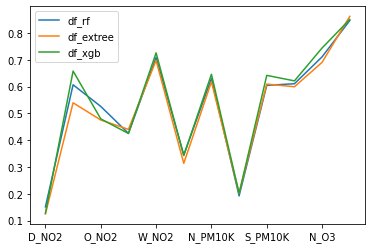

<AxesSubplot:>

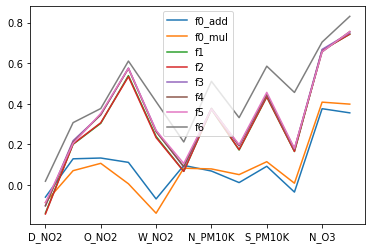

In [19]:
r2_df.iloc[:,:3].plot()
plt.show()
r2_df.iloc[:,3:].plot()

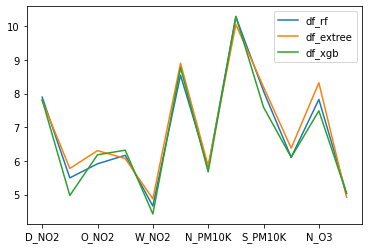

<AxesSubplot:>

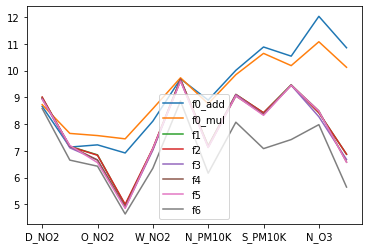

In [20]:
mae_df.iloc[:,:3].plot()
plt.show()
mae_df.iloc[:,3:].plot()

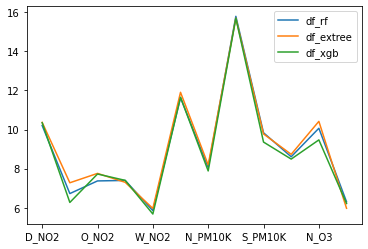

<AxesSubplot:>

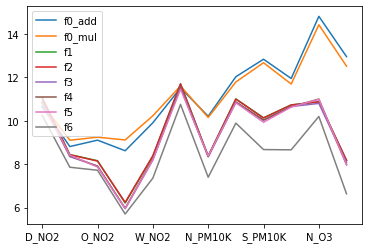

In [21]:
mse_df.iloc[:,:3].plot()
plt.show()
mse_df.iloc[:,3:].plot()

In [22]:
mse_df

,df_rf,df_extree,df_xgb,f0_add,f0_mul,f1,f2,f3,f4,f5,f6
D_NO2,10.209015,10.368937,10.350374,10.656541,10.784896,11.044325,11.066475,10.866745,10.869103,10.792818,10.254766
N_NO2,6.728185,7.280941,6.275053,8.814767,9.105680,8.444624,8.436923,8.350163,8.389350,8.419145,7.861658
O_NO2,7.375156,7.760535,7.728301,9.109146,9.245401,8.161948,8.145756,7.913857,7.908144,7.871843,7.723069
S_NO2,7.400431,7.304270,7.404239,8.621085,9.118223,6.211289,6.244759,5.954595,5.973242,5.962391,5.707621
W_NO2,5.856928,5.969101,5.683359,9.909399,10.230837,8.360626,8.393447,8.198914,8.231403,8.199473,7.360336
D_PM10K,11.632470,11.906623,11.652528,11.516580,11.604782,11.700164,11.702614,11.570945,11.551225,11.454935,10.755550
N_PM10K,8.063060,8.193315,7.885811,10.210372,10.152876,8.381239,8.372268,8.350677,8.347660,8.374208,7.401499
O_PM10K,15.791532,15.695632,15.695637,12.029718,11.788386,11.009697,10.998318,10.874425,10.861210,10.831529,9.893210
S_PM10K,9.837371,9.778030,9.362189,12.835933,12.674979,10.138879,10.128715,10.026450,10.034167,9.933674,8.675893
W_PM10K,8.610654,8.735074,8.492070,11.948683,11.693524,10.731916,10.729747,10.657061,10.649638,10.632228,8.663516


In [23]:
mae_df

,df_rf,df_extree,df_xgb,f0_add,f0_mul,f1,f2,f3,f4,f5,f6
D_NO2,7.895391,7.789648,7.817258,8.667026,8.732384,8.996274,9.016057,8.950940,8.959634,8.932909,8.587449
N_NO2,5.500202,5.779758,4.977875,7.144647,7.655854,7.172106,7.164092,7.117859,7.179872,7.207453,6.658122
O_NO2,5.917258,6.308470,6.184301,7.228239,7.575272,6.853574,6.839994,6.665670,6.658774,6.564008,6.430511
S_NO2,6.169102,6.074922,6.321539,6.925303,7.453163,4.980029,5.007021,4.882131,4.913003,4.854209,4.643628
W_NO2,4.664553,4.876539,4.428922,8.114060,8.580110,7.070438,7.102197,7.029817,7.077604,7.087992,6.353691
D_PM10K,8.543675,8.900973,8.769624,9.693671,9.735013,9.675916,9.678186,9.642240,9.631916,9.608964,8.865112
N_PM10K,5.817962,5.849319,5.677111,8.901227,8.764349,7.190943,7.184302,7.149480,7.140495,7.127934,6.170214
O_PM10K,10.275871,10.048860,10.289963,10.014018,9.850926,9.112716,9.111119,9.098771,9.054442,9.064014,8.074893
S_PM10K,8.072845,8.196261,7.596373,10.886004,10.647603,8.426021,8.429397,8.365885,8.369579,8.332044,7.087739
W_PM10K,6.110218,6.382687,6.107087,10.543632,10.189712,9.471166,9.458487,9.457222,9.464790,9.455860,7.425888
